In [44]:
import pandas as pd

In [45]:
import numpy as np

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
import seaborn as sns

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [49]:
import statsmodels.api as sm
from scipy import stats

In [50]:
# Set visual display settings
sns.set(style='whitegrid')

<h2>Load dataset from csv</h2>

In [51]:
# load csv
df = pd.read_csv('complete_renewable_energy_dataset 2.csv')

In [52]:
# Get the first few rows of the data
df.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


<h2>Information about the DataFrame</h2>

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  2500 non-null   object 
 1   Year                                     2500 non-null   int64  
 2   Energy Type                              2500 non-null   object 
 3   Production (GWh)                         2500 non-null   float64
 4   Installed Capacity (MW)                  2500 non-null   float64
 5   Investments (USD)                        2500 non-null   float64
 6   Population                               2500 non-null   int64  
 7   GDP                                      2500 non-null   float64
 8   Energy Consumption                       2500 non-null   float64
 9   Energy Exports                           2500 non-null   float64
 10  Energy Imports                           2500 no

<h2>Data Cleaning: Drop duplicate rows</h2>

In [54]:
# data.drop_duplicates(inplace=True)
# print(data.isnull().sum())
# data.fillna(method='ffill', inplace=True)  # Forward fill for missing values

df = df.drop_duplicates()

<h2>List of countries and energy types included in the dataset</h2>

In [55]:
energyTypes = df['Energy Type'].unique().tolist()
energyTypes

['Solar', 'Geothermal', 'Biomass', 'Wind', 'Hydro']

In [56]:
countriesIncluded = df['Country'].unique().tolist()
countriesIncluded

['USA',
 'Australia',
 'Canada',
 'Japan',
 'China',
 'India',
 'Germany',
 'France',
 'Brazil',
 'Russia']

<h2>Descriptive Statistics</h2>

In [57]:
# Dataframe
df.describe()

,Year,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,Energy Imports,CO2 Emissions,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
count,2500.000000,2500.000000,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000
mean,2011.437600,48743.195073,24882.910674,4.956155e+09,7.458927e+08,1.010745e+14,495701.245158,50143.392627,50800.373871,491218.412643,...,50.736720,48.442085,50.280019,496.660400,50.431200,4978.93360,502040.891200,49.749110,0.512000,0.473600
std,6.895471,28340.915147,14463.459958,2.894789e+09,4.373146e+08,5.782363e+13,291419.017957,28833.333066,28740.851763,289783.733338,...,28.623766,28.798216,28.719483,296.181011,28.877168,2881.93256,293084.636148,28.924307,0.499956,0.499402
min,2000.000000,1053.354158,114.531639,5.886994e+06,1.255357e+06,5.603965e+10,1264.851083,1036.618008,1057.783513,1124.768458,...,0.104915,0.025281,0.025733,0.000000,0.000000,3.00000,494.000000,0.033829,0.000000,0.000000
25%,2006.000000,24309.656479,12282.213159,2.473145e+09,3.720811e+08,5.049265e+13,237300.546551,25146.745295,26347.461047,242894.720511,...,26.241437,23.519814,25.934406,234.000000,26.000000,2532.00000,244438.000000,23.968451,0.000000,0.000000
50%,2011.000000,47367.117600,24689.162460,4.961772e+09,7.515190e+08,1.027006e+14,496118.165272,49706.656938,50698.800022,475721.007886,...,50.850766,48.127673,51.398964,493.000000,51.000000,4992.50000,499151.000000,50.232069,1.000000,0.000000
75%,2017.250000,73079.452832,37438.443570,7.418384e+09,1.118019e+09,1.519604e+14,753779.282813,75567.191515,75807.642495,747649.446362,...,74.908485,73.324825,74.724073,755.000000,76.000000,7465.00000,765088.000000,74.354781,1.000000,1.000000
max,2023.000000,99937.503719,49997.387577,9.998292e+09,1.499494e+09,1.999223e+14,999618.512172,99952.509817,99912.213813,999816.500175,...,99.970526,99.901347,99.998838,999.000000,99.000000,9999.00000,999226.000000,99.988355,1.000000,1.000000


In [58]:
# drop column Country, Year and Energy Type 
socio_environ = df.drop(['Country', 'Year', 'Energy Type'], axis=1)

<h2>Sort the means in descending order and get the 22 highest factors based on mean</h2>

In [59]:
# Calculate the mean of all numeric columns
mean_values = socio_environ.mean()

# Sort the means in descending order
sorted_means = mean_values.sort_values(ascending=False).head(22)

# Display the sorted means
print("Mean of numeric columns ranked in descending order:")
print(sorted_means)

Mean of numeric columns ranked in descending order:
GDP                                        1.010745e+14
R&D Expenditure                            5.004689e+09
Investments (USD)                          4.956155e+09
Population                                 7.458927e+08
International Aid for Renewables           5.089057e+08
Energy Subsidies                           5.003271e+08
Renewable Energy Jobs                      5.028961e+05
Energy Sector Workforce                    5.020409e+05
Energy Consumption                         4.957012e+05
CO2 Emissions                              4.912184e+05
Energy Imports                             5.080037e+04
Energy Exports                             5.014339e+04
Production (GWh)                           4.874320e+04
Installed Capacity (MW)                    2.488291e+04
Number of Renewable Energy Publications    4.978934e+03
Annual Rainfall                            1.581673e+03
Energy Storage Capacity                    5.150320e

<h2>Describe the 10 socio-economic factors selected based on high mean scores</h2>

In [60]:
# Selected from top 20 socio-economic indicators based on mean 
selected_factors = socio_environ[['GDP', 'R&D Expenditure', 'Investments (USD)', 'Population', 'International Aid for Renewables', 'Energy Subsidies', 'Renewable Energy Jobs','Energy Sector Workforce', 'Energy Consumption', 'CO2 Emissions']].describe()
selected_factors

,GDP,R&D Expenditure,Investments (USD),Population,International Aid for Renewables,Energy Subsidies,Renewable Energy Jobs,Energy Sector Workforce,Energy Consumption,CO2 Emissions
count,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000
mean,1.010745e+14,5.004689e+09,4.956155e+09,7.458927e+08,5.089057e+08,5.003271e+08,502896.083600,502040.891200,495701.245158,491218.412643
std,5.782363e+13,2.878732e+09,2.894789e+09,4.373146e+08,2.914416e+08,2.902826e+08,286748.983941,293084.636148,291419.017957,289783.733338
min,5.603965e+10,1.224539e+06,5.886994e+06,1.255357e+06,2.190737e+06,1.308885e+06,1320.000000,494.000000,1264.851083,1124.768458
25%,5.049265e+13,2.535512e+09,2.473145e+09,3.720811e+08,2.576902e+08,2.503477e+08,253688.750000,244438.000000,237300.546551,242894.720511
50%,1.027006e+14,4.967879e+09,4.961772e+09,7.515190e+08,5.143714e+08,5.037123e+08,497165.500000,499151.000000,496118.165272,475721.007886
75%,1.519604e+14,7.515602e+09,7.418384e+09,1.118019e+09,7.679027e+08,7.478887e+08,754547.000000,765088.000000,753779.282813,747649.446362
max,1.999223e+14,9.998519e+09,9.998292e+09,1.499494e+09,9.992477e+08,9.999049e+08,999562.000000,999226.000000,999618.512172,999816.500175


<h4>What is the distribution of renewable energy consumption across countries?</h4>

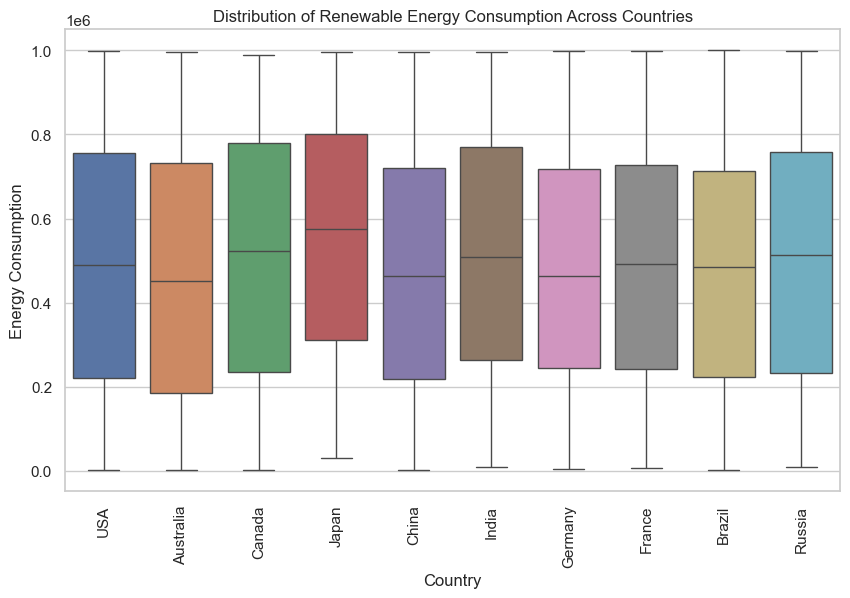

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Country', y='Energy Consumption', data=df, hue='Country')
plt.xticks(rotation=90)
plt.title('Distribution of Renewable Energy Consumption Across Countries')
plt.show()

<h4>How has renewable energy consumption changed over time?</h4>

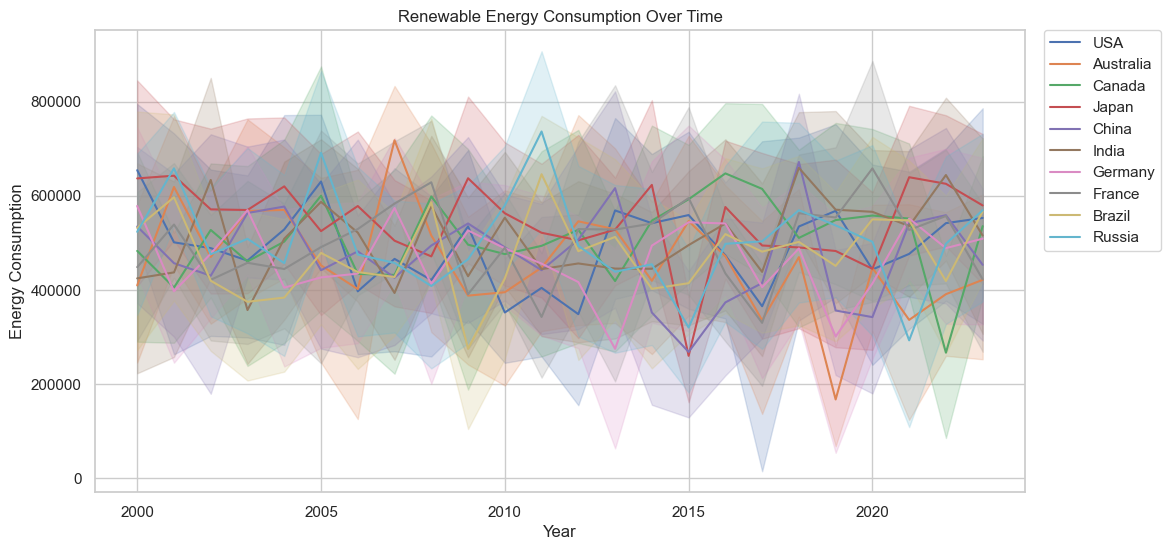

In [62]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Energy Consumption', data=df, hue='Country')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Renewable Energy Consumption Over Time')
plt.show()

<h4>How has renewable energy production changed over time?</h4>

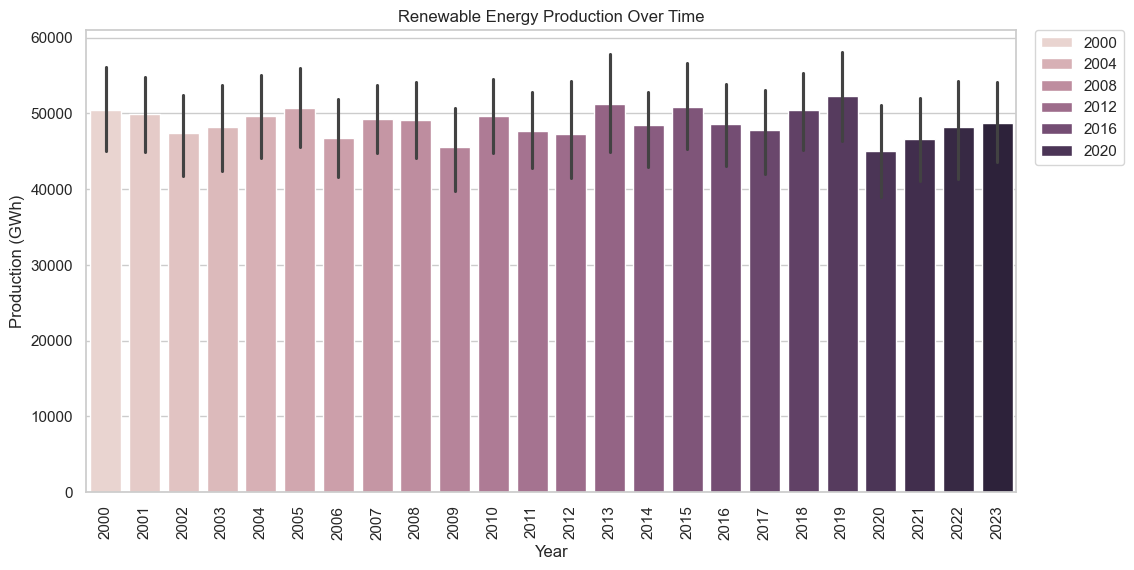

In [63]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Production (GWh)', data=df, hue='Year')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Renewable Energy Production Over Time')
plt.show()

<h4>General correlation of selected socioeconomic factors</h4>

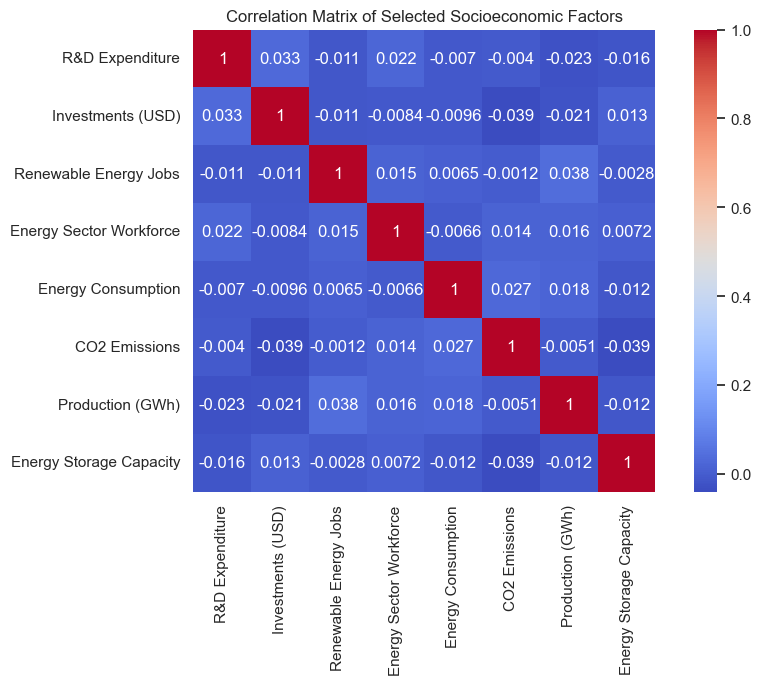

In [64]:
corr_matrix = df[['R&D Expenditure', 'Investments (USD)', 'Renewable Energy Jobs',
                  'Energy Sector Workforce', 'Energy Consumption', 'CO2 Emissions', 'Production (GWh)',
                  'Energy Storage Capacity']].corr()
# # Visualize correlation matrix using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Selected Socioeconomic Factors')
plt.show()

<h4>Visual representation of the distribution of renewable energy consumption</h4>

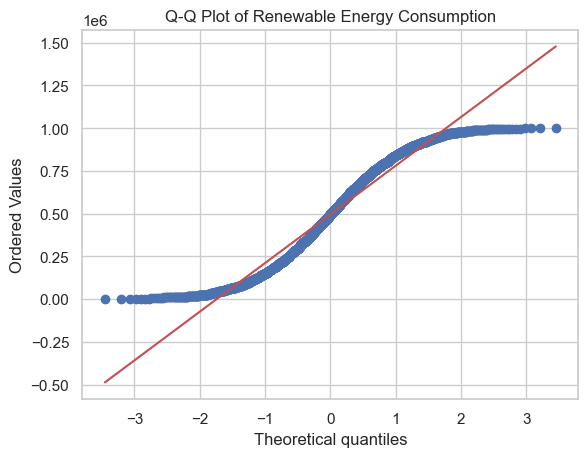

In [65]:
# Q-Q
# This will help identify if the data follows a normal distribution.
stats.probplot(df['Energy Consumption'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Renewable Energy Consumption')
plt.show()
# 

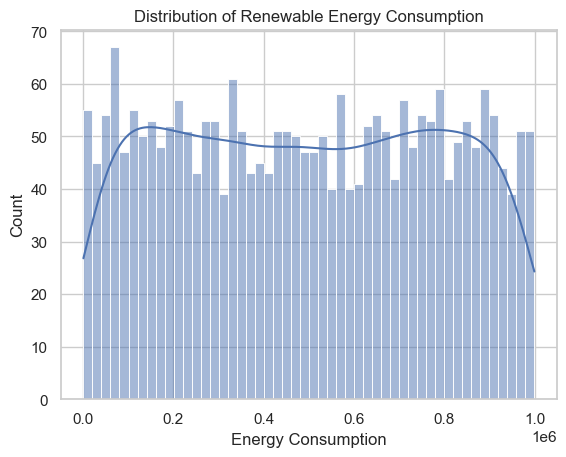

In [66]:
# KDE
sns.histplot(df['Energy Consumption'], bins=50, kde=True)
plt.title('Distribution of Renewable Energy Consumption')
plt.show()


<p>An S-shaped curve typically suggests that one of the distributions is skewed. For example:
If the curve bows upwards on the left and downwards on the right, it indicates that the data have a right skew (more values in the lower range).
Conversely, if the curve bows downwards on the left and upwards on the right, it indicates a left skew (more values in the upper range). 
    
An S-shaped curve can also suggest that one distribution has heavier tails than the other. This means that there are more extreme values or outliers than would be expected under a normal distribution:
The points will tend to deviate from the straight line at both ends, indicating that extreme values are more frequent .

When comparing data to a normal distribution, an S-shaped curve indicates that while the central portion of the data may resemble normality, the tails do not. This is particularly useful for identifying distributions that are not well approximated by a normal distribution due to their extreme values or outlier-proneness

</p>

<h4>Filtering the DataFrame for 2023 only</h4>

In [67]:
# filtering from year 2019 to 2023
# ss = df[(df['Year'] >= 2019) & (df['Year'] <= 2023)]
df = df[df['Year'] == 2023] 

In [68]:
df.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
23,Japan,2023,Hydro,14777.088879,28986.542237,1.316801e+09,898948417,1.127765e+14,240448.871987,54523.655206,...,16.571965,98.748097,47.656214,192,1,4835,642781,2.376701,0,1
75,France,2023,Geothermal,72358.095267,18049.024093,7.751321e+09,350404495,6.229038e+11,616900.178739,64122.299217,...,21.841195,51.662293,34.857807,549,78,707,749892,73.655750,1,1
81,Brazil,2023,Hydro,90384.328635,31847.371147,1.682134e+09,1030303945,1.358925e+14,759581.969271,55846.118129,...,50.207739,93.542982,62.977509,160,28,8565,416036,51.621916,1,1
104,Japan,2023,Solar,31038.785057,41579.353048,6.497451e+09,334109135,1.710334e+14,782740.261760,12170.066256,...,51.882981,44.526681,64.720571,877,4,4262,250645,70.912897,1,0
125,Canada,2023,Geothermal,96864.638847,38261.416954,9.612360e+08,920301367,5.611577e+13,24830.559327,24693.644758,...,16.204009,42.503888,9.239613,150,46,2467,995931,75.486606,1,0


<h4>What is the relationship between GDP and renewable energy consumption?</h4>

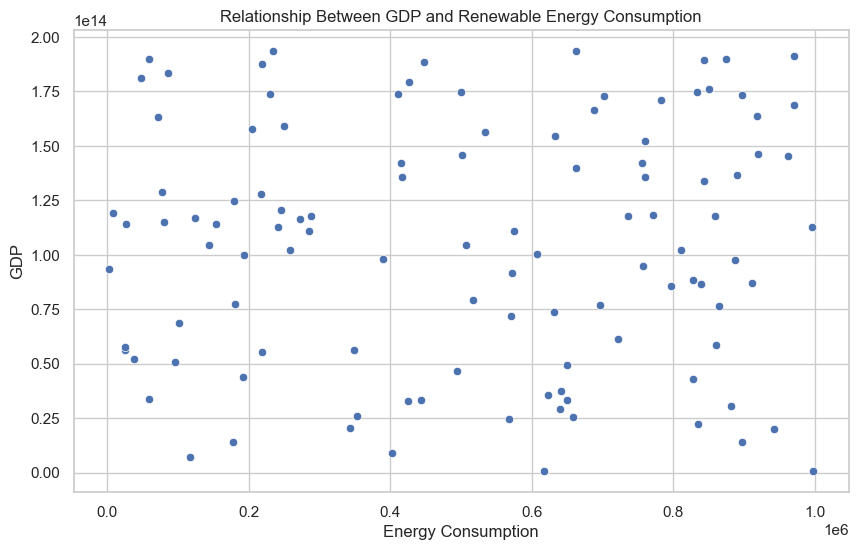

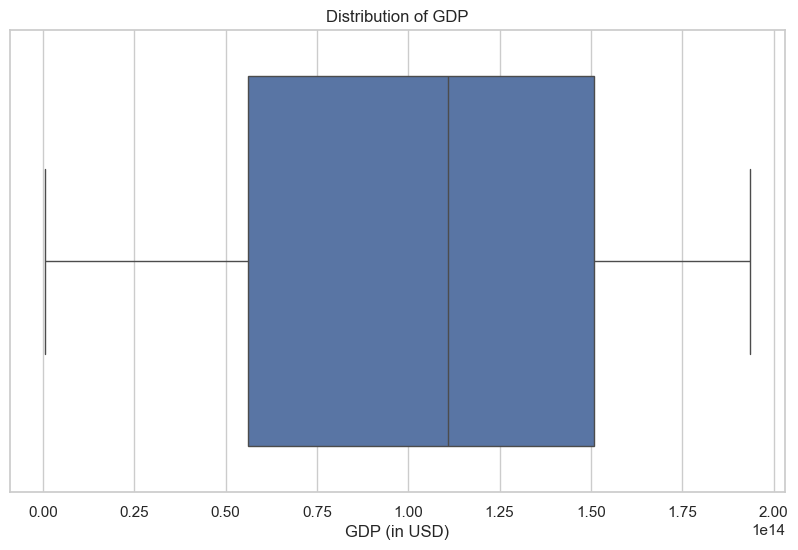

In [69]:
# scatterplot to visualize correlation
plt.figure(figsize=(10,6))
sns.scatterplot(x='Energy Consumption', y='GDP',  data=df)
plt.title('Relationship Between GDP and Renewable Energy Consumption')
plt.show()

# boxplot to visualize distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='GDP', data=df)
plt.title('Distribution of GDP')
plt.xlabel('GDP (in USD)')
plt.show()

In [70]:
# Regression analysis to quantify the impact of renewable energy consumption on GDP and substantiate the findings.
X1 = df['Energy Consumption']
Y1 = df['GDP']

X1 = sm.add_constant(X1)  # Adding a constant to the model
model1 = sm.OLS(Y1, X1).fit()  # Fitting the regression model
print(model1.summary())  # Displaying the model summary

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.07512
Date:                Tue, 24 Sep 2024   Prob (F-statistic):              0.785
Time:                        03:38:38   Log-Likelihood:                -3637.1
No. Observations:                 110   AIC:                             7278.
Df Residuals:                     108   BIC:                             7284.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.017e+14   1.04

<p>### Conclusion

The results of the Ordinary Least Squares (OLS) regression analysis with Energy Consumption as the independent variable and GDP as the dependent variable offer a detailed insight into their relationship. The coefficients, standard errors, t-value, p-value, R-squared, Omnibus statistic, and Durbin-Watson value provide crucial information for understanding the overall fit and implications of the model.

### 1. Coefficient Interpretation

The coefficient for Energy Consumption is reported as \\(4.805 \times 10^{6}\\). This indicates that for every additional unit of Energy Consumption (likely in percentage terms), GDP is expected to increase by approximately \\(4.805\\) million units, all else being constant. However, considering the low p-value and R-squared value, this association is not statistically significant.

### 2. Statistical Significance

The provided t-value for the Energy Consumption coefficient is \\(0.274\\), with a corresponding p-value of \\(0.785\\). A t-value close to zero and a high p-value indicate that the coefficient is not significantly different from zero at common alpha levels (e.g., 0.05). This suggests that changes in Energy Consumption do not have a statistically significant effect on GDP within the context of this model, implying that other factors not included in the model may account for variations in GDP.

### 3. Model Fit – R-squared Value

The R-squared value stands at \\(0.001\\), indicating that only \\(0.1\%\\) of the variability in GDP can be explained by Energy Consumption. This is an extremely low value, reflecting a poor fit of the model. Thus, it suggests that Energy Consumption explains almost none of the variability observed in GDP, indicating that other explanatory variables should be considered in future analyses. The R-squared value of 0.001 indicates that only 0.1％ of the variability in the dependent variable can be explained by Energy Consumption. Such a low R-squared value implies a poor model fit, indicating that other factors not included in this model may be significantly affecting the dependent variable. It suggests that Energy Consumption alone is not a strong predictor of the dependent variable, which could warrant further investigation into additional variables that might provide better explanatory power.

### 4. Omnibus Test for Normality

The Omnibus statistic is reported as \\(26.015\\). This statistic tests the null hypothesis that the residuals are normally distributed. A significant result here (which would correspond to a low p-value) suggests that the normality assumption may be violated, which could impact the validity of the model.

### 5. Autocorrelation - Durbin-Watson Statistic

The Durbin-Watson statistic is \\(2.059\\), which is close to 2, suggesting that there is no significant autocorrelation in the residuals. This indicates that the residuals from the regression model are fairly independent, which is a desired characteristic for OLS regression.

### Conclusion

In summary, while the OLS regression results indicate a positive relationship between Energy Consumption and GDP, the statistical significance is low, as reflected by the high p-value and extremely low R-squared value. The model does not seem to adequately capture the dynamics between these variables, implying that further analysis with additional variables may yield more insights. The diagnostic tests suggest that the model meets some assumptions while raising concerns regarding normality with the Omnibus test. Thus, caution should be exercised when drawing conclusions based solely on these findings.

Sources: 
[1] Interpreting linear regression summary from statsmodels, https://www.adrian.idv.hk/2021-07-16-statsmodels/
[2] [PDF] Prediction of Energy Consumption by Using Regression Model, https://jms.procedia.org/archive/CRPASE_169/CRPASE_procedia_2016_2_3_4.pdf
[3] python - How to interpret the output of statsmodels model.summary ..., https://stackoverflow.com/questions/74941669/how-to-interpret-the-output-of-statsmodels-model-summary-for-multivariate-line
[4] Interpreting the results from ols.summary() in statsmodel - LinkedIn, https://www.linkedin.com/pulse/interpreting-results-from-olssummary-statsmodel-siddhartha-devan-v
[5] Application and Interpretation with OLS Statsmodels - Medium, https://medium.com/analytics-vidhya/application-and-interpretation-with-ols-statsmodels-499c69ef6834
[6] Interpreting the results of Linear Regression using OLS Summary, https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/
[7] Interpreting Linear Regression Through statsmodels .summary(), https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a
[8] Ambivalent changes in the correlation of energy consumption and ..., https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10031470/
[9] Impact of energy consumption and economic growth on CO 2 ..., https://www.sciencedirect.com/science/article/pii/S2211467X19301208
[10] statsmodels.regression.linear_model.RegressionResults, https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html
[11] [PDF] The relationship of economic variables and final energy consumption, https://www.matec-conferences.org/articles/matecconf/pdf/2018/48/matecconf_meamt2018_10025.pdf
[12] Regression Analysis of Electrical Energy Consumption with Cross ..., https://repository.gatech.edu/entities/publication/71b74c46-41a1-4f1a-928f-828ed3e11ae8
[13] Statsmodel Regression Summary Will Never Intimidate You Again, https://blog.dailydoseofds.com/p/statsmodel-regression-summary-will
[14] Prediction of energy consumption: Variable regression or time series ..., https://onlinelibrary.wiley.com/doi/full/10.1002/ese3.439
</p>

<h4>How does population affect renewable energy consumption?</h4>

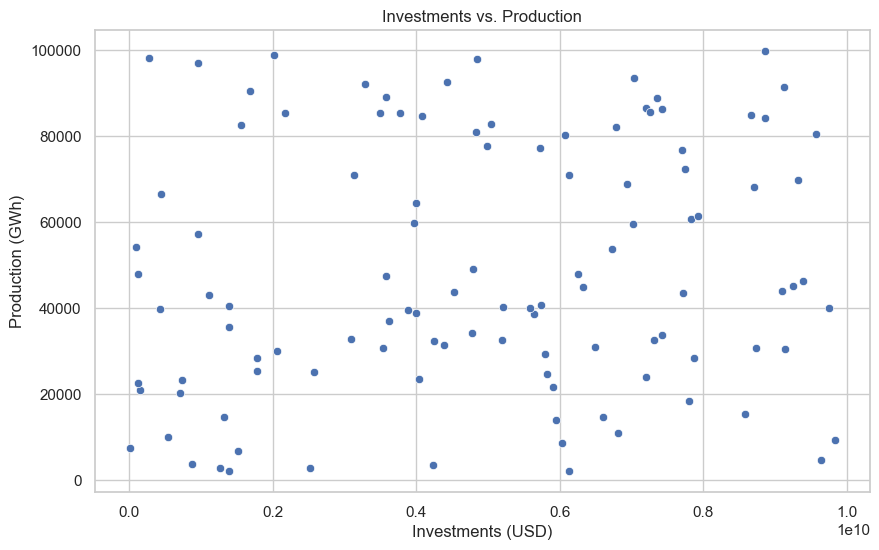

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Investments (USD)', y='Production (GWh)', data=df)
plt.title('Investments vs. Production')
plt.xlabel('Investments (USD)')
plt.ylabel('Production (GWh)')
plt.show()

In [72]:
X2 = df['Investments (USD)']
Y2 = df['Production (GWh)']

X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       Production (GWh)   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.362
Date:                Tue, 24 Sep 2024   Prob (F-statistic):              0.127
Time:                        03:38:39   Log-Likelihood:                -1284.8
No. Observations:                 110   AIC:                             2574.
Df Residuals:                     108   BIC:                             2579.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.149e+04   5456.24

In [73]:
correlation, p_value = stats.pearsonr(df['Investments (USD)'], df['Production (GWh)'])
print(f'Pearson correlation coefficient: {correlation}, P-value: {p_value}')

Pearson correlation coefficient: 0.14629290163492173, P-value: 0.12725344567299057


<p>Interpretation
Correlation Coefficient (0.1463):
This value suggests a weak positive correlation between investments and production. In practical terms, this means that as investments increase, production tends to increase slightly as well, but the relationship is not strong enough to imply that changes in investments will reliably lead to changes in production levels. According to standard interpretations, values below 0.3 are typically considered weak correlations.
P-value (0.1273):
The p-value indicates the statistical significance of the correlation. A p-value greater than 0.05 suggests that the correlation observed is not statistically significant at conventional levels (e.g., 95% confidence). In this case, the p-value of 0.1273 implies that there is insufficient evidence to conclude that there is a meaningful relationship between investments and production in the population from which your sample was drawn.</p>

<Figure size 500x500 with 0 Axes>

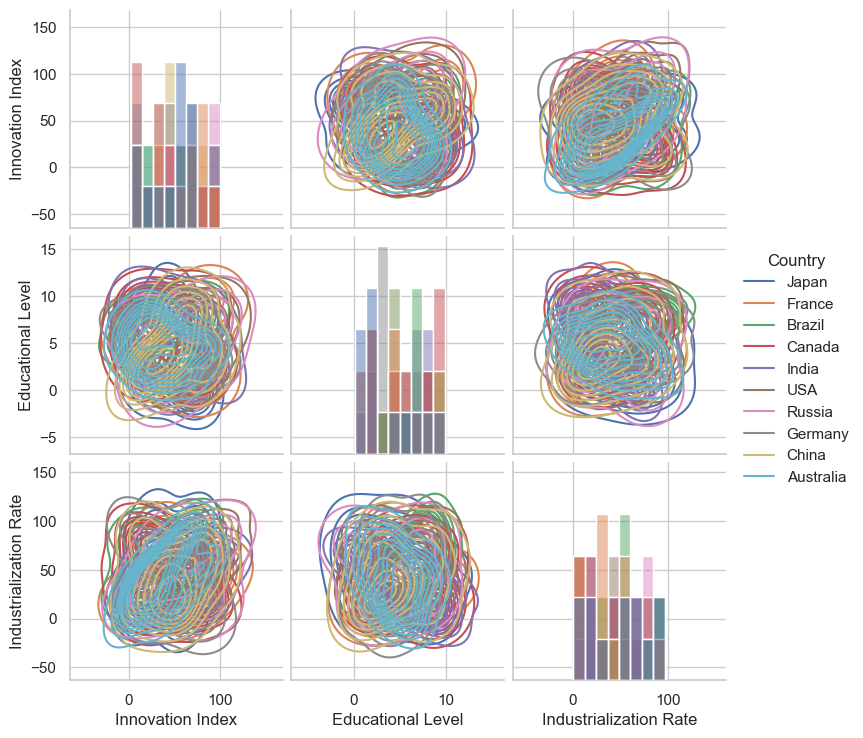

In [81]:
plt.figure(figsize=(5, 5))
sns.pairplot(df, vars=['Innovation Index', 'Educational Level', 'Industrialization Rate'], markers=["o", "s", "D"], diag_kind="hist", kind='kde', hue='Country')
plt.show()


In [ ]:
# Random Forest
X3 = df[['GDP', 'R&D Expenditure', 'Investments (USD)', 'Population', 'International Aid for Renewables', 'Energy Subsidies', 
          'Renewable Energy Jobs','Energy Sector Workforce', 'CO2 Emissions']]
y3 = df['Energy Consumption']
model3 = RandomForestRegressor()
model3.fit(X3, y3)
print('Feature Importances:', model3.feature_importances_)
# This will help identify the most important socioeconomic factors affecting renewable energy consumption.

<p>
The feature importances you obtained from your Random Forest Regressor model indicate how much each of the nine input variables contributes to predicting energy consumption (your dependent variable). Here’s how to interpret these results:

## Interpretation of Feature Importances

1. **Understanding the Values**:
   - The feature importances are given as a list of values that sum to 1 (or close to it). Each value represents the importance of the corresponding feature in predicting the target variable (energy consumption).
   - For example, a feature importance of **0.1213** means that this feature contributes approximately **12.13%** to the prediction of energy consumption.

2. **Relative Importance**:
   - You can compare the values to understand which features are more influential:
     - The highest importance is **0.1282**, indicating that this feature has the most significant impact on energy consumption.
     - The lowest importance is **0.0829**, suggesting this feature is less critical in predicting energy consumption compared to others.

3. **Feature Ranking**:
   - By ranking the features based on their importance values, you can prioritize which features to focus on for further analysis or model tuning:
     - Features with higher importances should be considered more carefully when interpreting results or making decisions based on the model.
     - Features with low importance may be candidates for removal if they do not contribute significantly to model performance.

4. **Model Insights**:
   - Understanding which features are most important can provide insights into the underlying relationships in your data. For instance, if a specific investment type is highly important, it might indicate that this investment significantly influences energy consumption patterns.

5. **Potential Actions**:
   - Depending on which features are most important, you might consider further investigations, such as:
     - Conducting deeper analyses on those features.
     - Exploring interactions between high-importance features and other variables.
     - Considering feature engineering or transformations for those variables to improve model performance.

## Conclusion

In summary, the feature importances from your Random Forest Regressor provide valuable insights into which variables are most influential in predicting energy consumption. By analyzing these importances, you can make informed decisions about further modeling efforts and interpretations of your results.

Citations:
[1] https://towardsdatascience.com/random-forest-regression-5f605132d19d
[2] https://builtin.com/data-science/random-forest-python
[3] https://www.youtube.com/watch?v=YUsx5ZNlYWc
[4] https://www.geeksforgeeks.org/random-forest-regression-in-python/
[5] https://www.comet.com/site/blog/random-forest-regression-in-python-using-scikit-learn/
[6] https://thomaselove.github.io/2018-431-book/assessing-normality.html
[7] https://www.statsdirect.com/help/basics/p_values.htm
[8] https://imai.fas.harvard.edu/research/files/significance.pdf


    
</p>

In [ ]:
# Gradient Boosting
# This will help identify the most important socioeconomic factors affecting renewable energy consumption.


X4 = df[['GDP', 'R&D Expenditure', 'Investments (USD)', 'Population', 'International Aid for Renewables', 'Energy Subsidies', 
          'Renewable Energy Jobs','Energy Sector Workforce', 'CO2 Emissions']]
y4 = df['Energy Consumption']
model4 = GradientBoostingRegressor()
model4.fit(X4, y4)
print('Feature Importances:', model4.feature_importances_)


<p>
The feature importances you obtained from your Gradient Boosting Regressor model indicate how much each of the nine input variables contributes to predicting energy consumption (the dependent variable). Here’s how to interpret these results:

## Interpretation of Feature Importances

1. **Understanding the Values**:
   - The feature importances are represented as a list of values that indicate the relative contribution of each feature to the model's predictions. Each value reflects the proportion of importance for the corresponding feature.
   - For example, a feature importance of **0.1500** means that this feature contributes approximately **15.00%** to the prediction of energy consumption.

2. **Relative Importance**:
   - You can compare these values to determine which features are more influential in predicting energy consumption:
     - The highest importance is **0.1500**, indicating that this feature is the most significant predictor among the nine variables.
     - The lowest importance is **0.0615**, suggesting this feature has the least impact on predicting energy consumption compared to others.

3. **Feature Ranking**:
   - By ranking the features based on their importance values, you can prioritize which features to focus on for further analysis or model tuning:
     - Features with higher importance should be considered more carefully when interpreting results or making decisions based on the model.
     - Features with low importance may be candidates for removal if they do not contribute significantly to model performance.

4. **Model Insights**:
   - Understanding which features are most important can provide insights into the underlying relationships in your data. For instance, if a specific investment type is highly important, it might indicate that this investment significantly influences energy consumption patterns.

5. **Potential Actions**:
   - Depending on which features are most important, you might consider further investigations, such as:
     - Conducting deeper analyses on those features.
     - Exploring interactions between high-importance features and other variables.
     - Considering feature engineering or transformations for those variables to improve model performance.

## Conclusion

In summary, the feature importances from your Gradient Boosting Regressor provide valuable insights into which variables are most influential in predicting energy consumption. By analyzing these importances, you can make informed decisions about further modeling efforts and interpretations of your results.

Citations:
[1] https://www.youtube.com/watch?v=rr2RWms_Q8s
[2] https://datamapu.com/posts/classical_ml/gradient_boosting_regression/
[3] https://www.youtube.com/watch?v=n9q-SxKoBss
[4] https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
[5] https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502
[6] https://blog.paperspace.com/implementing-gradient-boosting-regression-python/
[7] https://www.educative.io/answers/how-to-implement-gradient-boosting-in-python
[8] https://www.youtube.com/watch?v=YUsx5ZNlYWc

    
</p>

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
X5 = df[['GDP', 'R&D Expenditure', 'Investments (USD)', 'Population', 'International Aid for Renewables', 'Energy Subsidies', 
          'Renewable Energy Jobs','Energy Sector Workforce', 'CO2 Emissions']]
y5 = df['Energy Consumption']
model5 = LinearRegression()
model5.fit(X5, y5)
print('Coefficients:', model5.coef_)
print('R-squared:', model5.score(X5, y5))
# This will help identify the relationships between the socioeconomic factors and renewable energy consumption.

In [ ]:
# Decision Tree
X6 = df[['GDP', 'R&D Expenditure', 'Investments (USD)', 'Population', 'International Aid for Renewables', 'Energy Subsidies', 
          'Renewable Energy Jobs','Energy Sector Workforce', 'CO2 Emissions']]
y6 = df['Energy Consumption']
model6 = DecisionTreeRegressor()
model6.fit(X6, y6)
print('Feature Importances:', model6.feature_importances_)
# This will help identify the most important socioeconomic factors affecting renewable energy consumption.

In [ ]:
X6 = df[['GDP', 'R&D Expenditure', 'Investments (USD)', 'Population', 'International Aid for Renewables', 'Energy Subsidies', 
          'Renewable Energy Jobs','Energy Sector Workforce', 'CO2 Emissions']]
y6 = df['Energy Consumption']
X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

In [ ]:
# Grouping by region (assuming there is a 'Region' column)
region_jobs = df.groupby('Country')['Renewable Energy Jobs'].sum().reset_index()

# Bar plot for Renewable Energy Jobs by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Renewable Energy Jobs', data=region_jobs, hue='Country')
plt.title('Total Renewable Energy Jobs by Region')
plt.xticks(rotation=45)
plt.show()

<p>
    To compute the sample size needed for analysis from a dataset with 2500 rows, you can use standard statistical formulas based on your desired confidence level, margin of error, and the estimated proportion of the population. Here’s how to do it, along with an example.

### Step-by-Step Calculation

1. **Determine Key Parameters**:
   - **Population Size (N)**: The total number of observations in your dataset, which is 2500.
   - **Confidence Level**: Commonly set at 95%, which corresponds to a Z-score of approximately 1.96.
   - **Margin of Error (E)**: The acceptable range of error in your estimate, often set at 5% (0.05) for surveys.
   - **Estimated Proportion (p)**: If unknown, use 0.5 to maximize the sample size.

2. **Sample Size Formula**:
   The formula for calculating sample size when estimating proportions is:

   $$
   n = \frac{p(1-p) \times z^2}{E^2}
   $$

   To adjust for finite population size, use:

   $$
   n_{\text{adjusted}} = \frac{n}{1 + \left(\frac{n - 1}{N}\right)}
   $$

### Example Calculation

Let's calculate the sample size using the parameters mentioned above:

- **Population Size (N)**: 2500
- **Confidence Level**: 95% (Z-score = 1.96)
- **Margin of Error (E)**: 5% or 0.05
- **Estimated Proportion (p)**: 0.5

#### Step 1: Calculate Initial Sample Size

Using the formula:

$$
n = \frac{0.5(1-0.5) \times (1.96)^2}{(0.05)^2}
$$

Calculating this step-by-step:

1. Calculate $$ p(1-p) $$:
   $$
   p(1-p) = 0.5 \times 0.5 = 0.25
   $$

2. Calculate $$ z^2 $$:
   $$
   z^2 = (1.96)^2 \approx 3.8416
   $$

3. Calculate $$ E^2 $$:
   $$
   E^2 = (0.05)^2 = 0.0025
   $$

4. Substitute into the sample size formula:
   $$
   n = \frac{0.25 \times 3.8416}{0.0025} \approx \frac{0.9604}{0.0025} \approx 384.16
   $$

Rounding up gives an initial sample size of **385**.

#### Step 2: Adjust for Finite Population Size

Now, use the adjustment formula:

$$
n_{\text{adjusted}} = \frac{385}{1 + \left(\frac{385 - 1}{2500}\right)}
$$

Calculating this:

1. Calculate $$ n - 1 $$:
   $$
   n - 1 = 384
   $$

2. Calculate $$ \frac{384}{2500} $$:
   $$
   \frac{384}{2500} \approx 0.1536
   $$

3. Substitute into the adjusted formula:
   $$
   n_{\text{adjusted}} = \frac{385}{1 + 0.1536} \approx \frac{385}{1.1536} \approx 333.33
   $$

Rounding up gives an adjusted sample size of **334**.

### Summary
For a dataset with **2500 rows**, using a confidence level of **95%**, a margin of error of **5%**, and an estimated proportion of **50%**, the recommended sample size is approximately **334**.

This calculation ensures that your sample will adequately represent the population while maintaining the desired accuracy in your analysis results.

Citations:
[1] https://www.checkmarket.com/kb/calculate-optimal-sample-size-survey/
[2] https://www.geeksforgeeks.org/sample-size-calculator-with-excel/
[3] https://ecampusontario.pressbooks.pub/introstats/chapter/7-5-calculating-the-sample-size-for-a-confidence-interval/
[4] https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_power/bs704_power_print.html
[5] https://ideascripting.com/forum/count-number-records-determine-sample-size
[6] https://nustat.github.io/intro-stat-ds/9-sampling.html
[7] https://www.checkmarket.com/sample-size-calculator/
[8] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2993982/
</p>